In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('insurance.csv')

In [6]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [8]:
data.shape

(1338, 7)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
data.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [10]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [3]:
data['sex']=data['sex'].map({'female':0, 'male':1})
data['smoker']=data['smoker'].map({'yes':1, 'no':0})
data['region'] = data['region'].map({'southwest': 1, 'southeast': 2, 'northwest': 3, 'northeast': 4})
                

In [12]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


In [13]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
X = data.drop(['charges'],axis=1)

In [5]:
y = data['charges']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
from sklearn.ensemble import GradientBoostingRegressor

In [9]:
from sklearn.ensemble import GradientBoostingRegressor

gr = GradientBoostingRegressor()
gr.fit(X_train, y_train)

GradientBoostingRegressor()

In [10]:
y_pred4 = gr.predict(X_test)
data1 = pd.DataFrame({'Actual' : y_test, 'gr': y_pred4})

In [21]:
data1

,Actual,gr
764,9095.06825,11001.128629
887,5272.17580,5840.174656
890,29330.98315,28001.980112
1293,9301.89355,9745.291602
259,33750.29180,33639.100981
...,...,...
109,47055.53210,45431.423211
575,12222.89830,12465.025294
535,6067.12675,6974.336525
543,63770.42801,47862.047791


In [31]:
import matplotlib.pyplot as plt

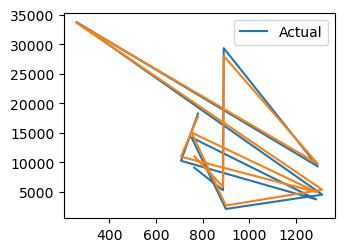

In [35]:
plt.subplot(221)
plt.plot(data1['Actual'].iloc[0:11],label='Actual')
plt.plot(data1['gr'].iloc[0:11])
plt.tight_layout()
plt.legend()

In [36]:
from sklearn import metrics

In [38]:
score = metrics.r2_score(y_test,y_pred4)
print("R2 Score:",score)

R2 Score: 0.8779726251291786


In [39]:
mean_score = metrics.mean_absolute_error(y_test,y_pred4)
print("Mean Absolute Error Score:",mean_score)

Mean Absolute Error Score: 2447.951558054584


In [11]:
data = {'age':35,
       'sex':1,
       'bmi':29.3,
       'children':1,
       'smoker':0,
       'region':2}

ndf = pd.DataFrame(data, index=[0])
ndf

,age,sex,bmi,children,smoker,region
0,35,1,29.3,1,0,2


In [12]:
new_pred = gr.predict(ndf)
print("Present Insurance Value Offered : ",new_pred)

Present Insurance Value Offered :  [6218.74892665]


In [13]:
gr = GradientBoostingRegressor()
gr.fit(X,y)

GradientBoostingRegressor()

In [14]:
import joblib

In [15]:
joblib.dump(gr,'insurance_cost_prediction')

['insurance_cost_prediction']

In [16]:
model = joblib.load('insurance_cost_prediction')

In [17]:
model

GradientBoostingRegressor()

In [18]:
from tkinter import *

In [19]:
import joblib

In [37]:
def show_entry() :
    
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())
    
    model = joblib.load('insurance_cost_prediction')
    result = model.predict([[p1,p2,p3,p4,p5,p6]])
    
    Label(master, text = "Insurance Cost").grid(row=7)
    Label(master, text=result).grid(row=8)

master = Tk()
master.title("Insurance cost prediction")
label = Label(master,text = "Insurance Cost Prediction",bg = "blue",
             fg = "white").grid(row=0,columnspan=2)

Label(master,text = "ENTER YOUR AGE").grid(row=1)
Label(master,text = "MALE OR FEMALE [1/0]").grid(row=2)
Label(master,text = "ENTER YOUR BMI").grid(row=3)
Label(master,text = "ENTER NUMBER OF CHILDREN").grid(row=4)
Label(master,text = "SMOKER YES/NO [1/0]").grid(row=5)
Label(master,text = "REGION [1/4]").grid(row=6)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)


e1.grid(row=1,column=1)
e1.grid(row=2,column=1)
e1.grid(row=3,column=1)
e1.grid(row=4,column=1)
e1.grid(row=5,column=1)
e1.grid(row=6,column=1)

Button(master,text="Predict",command=show_entry).grid()

mainloop()

In [20]:
from tkinter import *
import joblib

def show_entry():
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())

    model = joblib.load('insurance_cost_prediction')
    result = model.predict([[p1, p2, p3, p4, p5, p6]])

    Label(master, text="Insurance Cost").grid(row=7)
    Label(master, text=result).grid(row=8)

master = Tk()
master.title("Insurance cost prediction")
label = Label(master, text="Insurance Cost Prediction", bg="blue", fg="white")
label.grid(row=0, columnspan=2)

Label(master, text="ENTER YOUR AGE").grid(row=1)
Label(master, text="MALE OR FEMALE [1/0]").grid(row=2)
Label(master, text="ENTER YOUR BMI").grid(row=3)
Label(master, text="ENTER NUMBER OF CHILDREN").grid(row=4)
Label(master, text="SMOKER YES/NO [1/0]").grid(row=5)
Label(master, text="REGION [1/4]").grid(row=6)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)

Button(master, text="Predict", command=show_entry).grid(row=7, columnspan=2)

mainloop()
